NAME: **SULEGAMA JHANSI**

COURSE: **DATA SCIENCE (3PM TO 5PM)**

INCHARGE: **PANAM SRAVANI**

In [15]:
pip install -U scikit-learn


In [21]:
!pip install -U scikit-learn

Dataset shape: (214, 10)


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1



Missing values per column:
RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

Descriptive statistics:


,count,mean,std,min,25%,50%,75%,max
RI,214.0,1.518365,0.003037,1.51115,1.516522,1.51768,1.519157,1.53393
Na,214.0,13.407850,0.816604,10.73000,12.907500,13.30000,13.825000,17.38000
Mg,214.0,2.684533,1.442408,0.00000,2.115000,3.48000,3.600000,4.49000
Al,214.0,1.444907,0.499270,0.29000,1.190000,1.36000,1.630000,3.50000
Si,214.0,72.650935,0.774546,69.81000,72.280000,72.79000,73.087500,75.41000
K,214.0,0.497056,0.652192,0.00000,0.122500,0.55500,0.610000,6.21000
Ca,214.0,8.956963,1.423153,5.43000,8.240000,8.60000,9.172500,16.19000
Ba,214.0,0.175047,0.497219,0.00000,0.000000,0.00000,0.000000,3.15000
Fe,214.0,0.057009,0.097439,0.00000,0.000000,0.00000,0.100000,0.51000
Type,214.0,2.780374,2.103739,1.00000,1.000000,2.00000,3.000000,7.00000



Class distribution:


<ipython-input-22-abeb9a015c09>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Type", data=glass, palette="Set1")  # Changed color palette


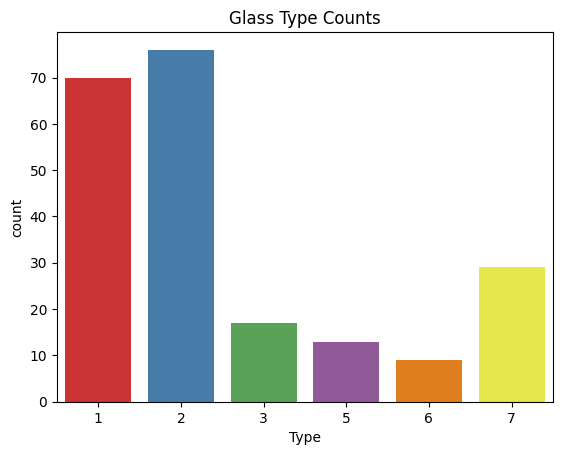

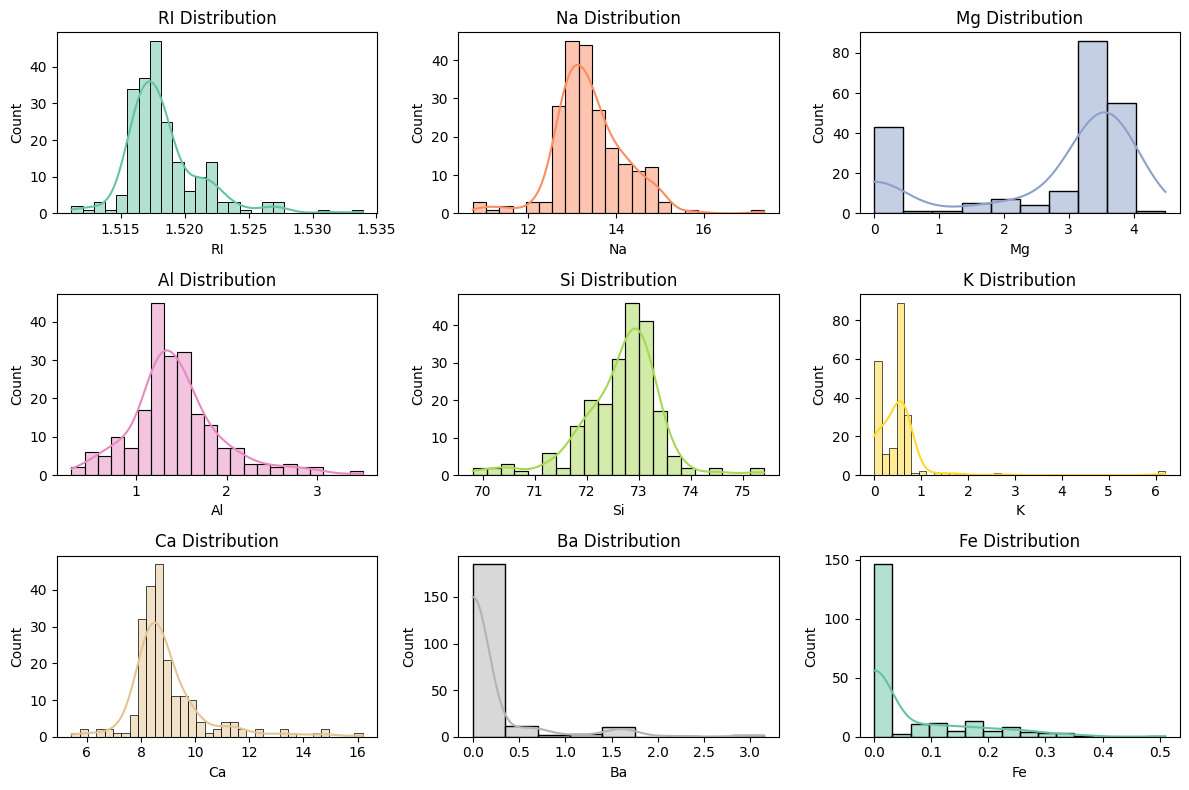

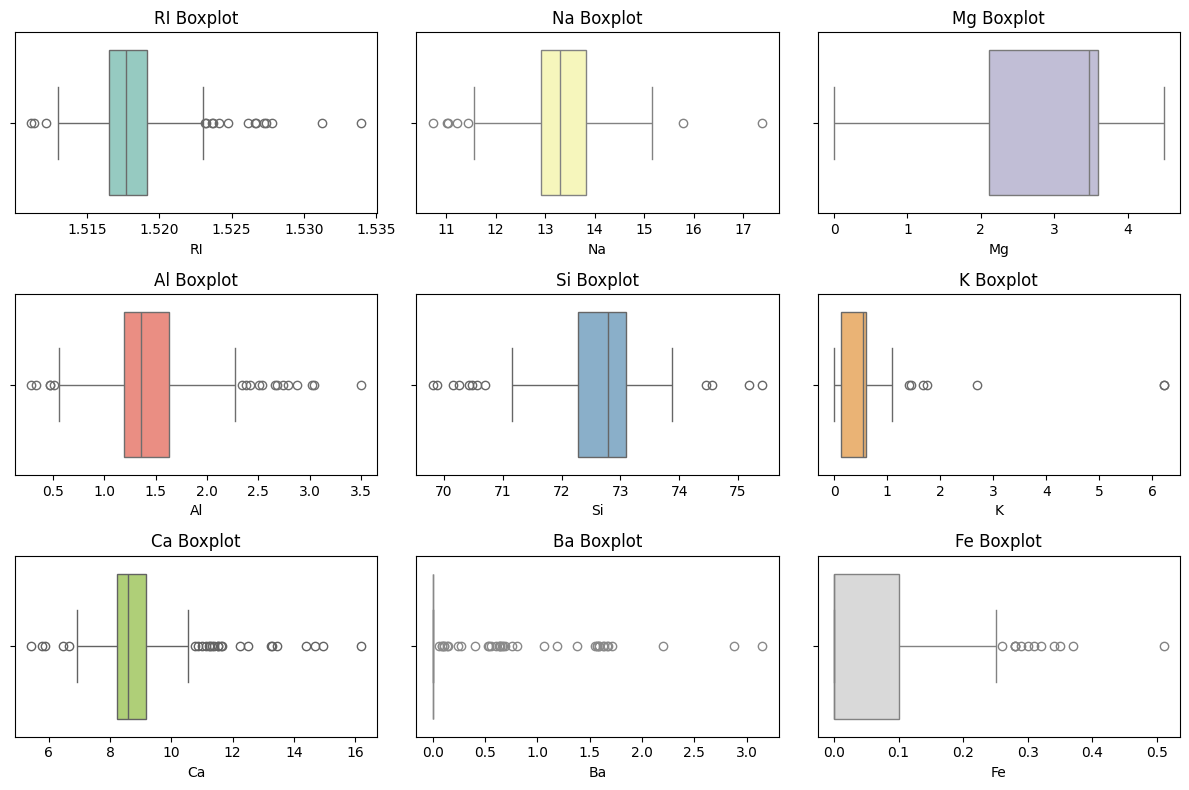


Random Forest Classifier - Performance
Accuracy: 0.7692307692307693
              precision    recall  f1-score   support

           0       0.74      0.89      0.81        19
           1       0.75      0.65      0.70        23
           2       0.67      0.50      0.57         4
           3       0.75      0.50      0.60         6
           4       0.75      1.00      0.86         3
           5       0.91      1.00      0.95        10

    accuracy                           0.77        65
   macro avg       0.76      0.76      0.75        65
weighted avg       0.77      0.77      0.76        65


Bagging Classifier - Performance
Accuracy: 0.8
              precision    recall  f1-score   support

           0       0.74      0.89      0.81        19
           1       0.80      0.70      0.74        23
           2       0.67      0.50      0.57         4
           3       1.00      0.67      0.80         6
           4       0.75      1.00      0.86         3
           5   

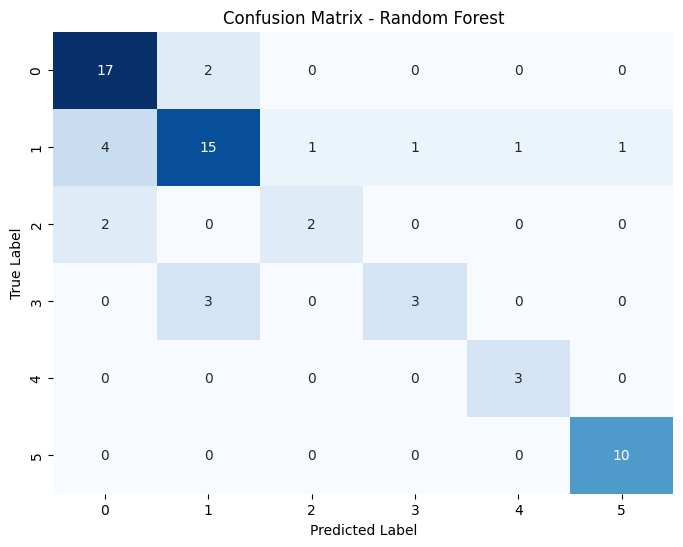

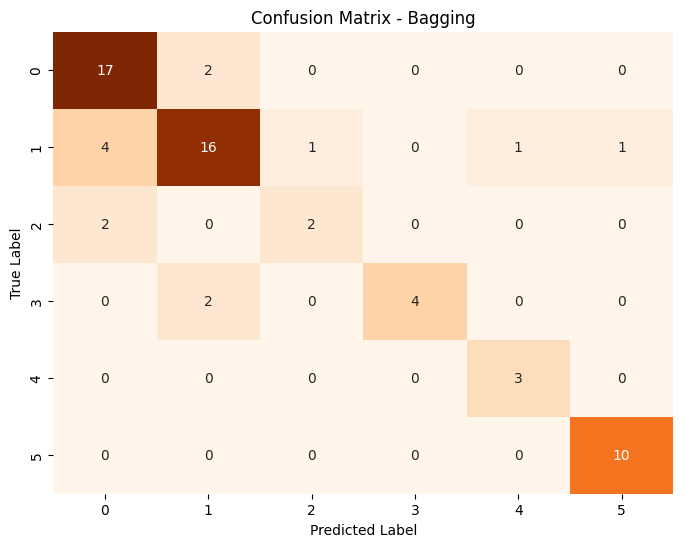

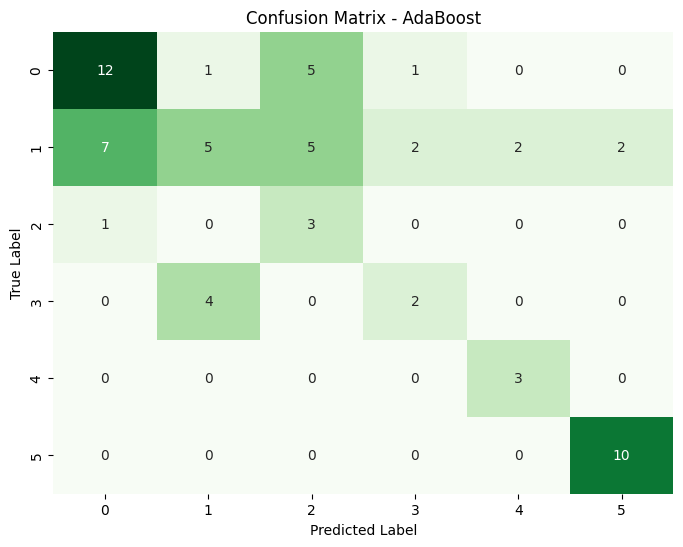

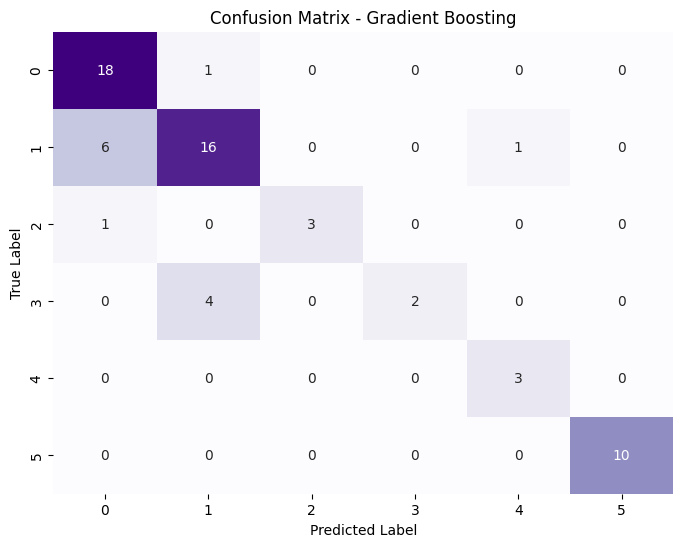


Random Forest (with balanced class weights) - Performance
Accuracy: 0.7692307692307693
              precision    recall  f1-score   support

           0       0.71      0.89      0.79        19
           1       0.73      0.70      0.71        23
           2       1.00      0.25      0.40         4
           3       0.75      0.50      0.60         6
           4       0.75      1.00      0.86         3
           5       1.00      1.00      1.00        10

    accuracy                           0.77        65
   macro avg       0.82      0.72      0.73        65
weighted avg       0.78      0.77      0.76        65



In [22]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import (
    RandomForestClassifier,
    BaggingClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier
)
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Load data from the 'glass' sheet
glass = pd.read_excel("glass.xlsx", sheet_name="glass")
print(f"Dataset shape: {glass.shape}")
display(glass.head())

# 2. EDA
print("\nMissing values per column:")
print(glass.isnull().sum())

print("\nDescriptive statistics:")
display(glass.describe().T)

print("\nClass distribution:")
sns.countplot(x="Type", data=glass, palette="Set1")  # Changed color palette
plt.title("Glass Type Counts")
plt.show()


# 3. Data Visualization (Fixed part)
num_cols = glass.columns.drop("Type")  # Drop the target column to get numeric columns

# Determine the number of rows and columns based on the number of numerical columns
n_cols = 3  # Number of columns in the subplot grid
n_rows = (len(num_cols) // n_cols) + (1 if len(num_cols) % n_cols != 0 else 0)  # Calculate rows needed

# Create a custom color palette to ensure we have enough colors
color_palette = sns.color_palette("Set2", len(num_cols))

# Histograms for numerical columns
plt.figure(figsize=(12, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(glass[col], kde=True, color=color_palette[i-1])  # Use the custom color palette
    plt.title(f"{col} Distribution")
plt.tight_layout()
plt.show()

# Boxplot for numerical columns
plt.figure(figsize=(12, 8))
for i, col in enumerate(num_cols, 1):
    # The subplot grid is defined as 3 rows and 3 columns (3x3) to accommodate 9 features
    plt.subplot(3, 3, i)
    sns.boxplot(x=glass[col], color=sns.color_palette("Set3")[i-1])  # Changed colors
    plt.title(f"{col} Boxplot")
plt.tight_layout()
plt.show()

# 4. Preprocessing
# Encode target labels
le = LabelEncoder()
glass["Type"] = le.fit_transform(glass["Type"])

# Feature scaling
scaler = StandardScaler()
X = glass.drop("Type", axis=1)
y = glass["Type"]
X_scaled = scaler.fit_transform(X)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# 5. Model Implementation
# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("\nRandom Forest Classifier - Performance")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# Bagging
bag = BaggingClassifier(
    DecisionTreeClassifier(), # removed base_estimator=
    n_estimators=100,
    random_state=42
)
bag.fit(X_train, y_train)
y_pred_bag = bag.predict(X_test)
print("\nBagging Classifier - Performance")
print("Accuracy:", accuracy_score(y_test, y_pred_bag))
print(classification_report(y_test, y_pred_bag))

# Boosting (AdaBoost)
ada = AdaBoostClassifier(n_estimators=100, random_state=42)
ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)
print("\nAdaBoost Classifier - Performance")
print("Accuracy:", accuracy_score(y_test, y_pred_ada))
print(classification_report(y_test, y_pred_ada))

# Boosting (Gradient Boosting)
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
print("\nGradient Boosting Classifier - Performance")
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))

# 6. Model Comparison
# Confusion Matrix for Random Forest
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Random Forest")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

# Confusion Matrix for Bagging
conf_matrix_bag = confusion_matrix(y_test, y_pred_bag)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_bag, annot=True, fmt="d", cmap="Oranges", cbar=False)
plt.title("Confusion Matrix - Bagging")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

# Confusion Matrix for AdaBoost
conf_matrix_ada = confusion_matrix(y_test, y_pred_ada)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_ada, annot=True, fmt="d", cmap="Greens", cbar=False)
plt.title("Confusion Matrix - AdaBoost")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

# Confusion Matrix for Gradient Boosting
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_gb, annot=True, fmt="d", cmap="Purples", cbar=False)
plt.title("Confusion Matrix - Gradient Boosting")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

# 7. Handling Class Imbalance (Optional - Can use SMOTE or class_weight='balanced')
# For illustration, using class_weight='balanced' in Random Forest Classifier
rf_imbalanced = RandomForestClassifier(n_estimators=100, class_weight="balanced", random_state=42)
rf_imbalanced.fit(X_train, y_train)
y_pred_rf_imbalanced = rf_imbalanced.predict(X_test)
print("\nRandom Forest (with balanced class weights) - Performance")
print("Accuracy:", accuracy_score(y_test, y_pred_rf_imbalanced))
print(classification_report(y_test, y_pred_rf_imbalanced))


#1. Bagging vs. Boosting
Bagging (Bootstrap Aggregating)
 Trains multiple models independently on random subsets of the data and combines their results (via voting or averaging).

 Reduces overfitting and variance.

Example: Random Forest.

Boosting
 Trains models sequentially, with each one correcting the errors of the previous one.

 Reduces bias and variance, focusing on hard-to-classify examples.

Example: AdaBoost, Gradient Boosting.



#2. Handling Imbalanced Data
Methods:
Resampling:


Oversampling: Add more examples of the minority class (e.g., SMOTE).

Undersampling: Remove examples from the majority class.

Class Weights:

Adjust the weights of the classes so the model pays more attention to the minority class (e.g., class_weight='balanced' in Random Forest).

Evaluation Metrics:

Use Precision, Recall, and F1-Score instead of Accuracy to better measure performance on imbalanced data.